In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
cd ..

C:\Users\saira\Documents\Giet_College\CONFIRMED\Bitcoin\Source_Code\archive (13)\Source_Code


In [5]:
df=pd.read_csv('dataset/Bitcoin.csv')

In [6]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021","48,846.3","49,532.5","49,847.4","48,812.4",59.89K,-1.40%
1,"Aug 23, 2021","49,539.7","49,255.4","50,498.8","49,038.6",75.37K,0.58%
2,"Aug 22, 2021","49,254.5","48,870.4","49,480.3","48,151.0",49.32K,0.77%
3,"Aug 21, 2021","48,875.8","49,330.0","49,719.1","48,293.5",18.20K,-0.91%
4,"Aug 20, 2021","49,324.0","46,756.7","49,343.3","46,646.8",83.19K,5.49%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4056 non-null   object
 1   Price     4056 non-null   object
 2   Open      4056 non-null   object
 3   High      4056 non-null   object
 4   Low       4056 non-null   object
 5   Vol.      4056 non-null   object
 6   Change %  4056 non-null   object
dtypes: object(7)
memory usage: 221.9+ KB


In [8]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df["Date"] = df["Date"].replace(",", "", regex=True)
df["Date"] = df["Date"].replace(" ", "-", regex=True)
df["Date"] = df["Date"].replace("Jan", "01", regex=True)
df["Date"] = df["Date"].replace("Feb", "02", regex=True)
df["Date"] = df["Date"].replace("Mar", "03", regex=True)
df["Date"] = df["Date"].replace("Apr", "04", regex=True)
df["Date"] = df["Date"].replace("May", "05", regex=True)
df["Date"] = df["Date"].replace("Jun", "06", regex=True)
df["Date"] = df["Date"].replace("Jul", "07", regex=True)
df["Date"] = df["Date"].replace("Aug", "08", regex=True)
df["Date"] = df["Date"].replace("Sep", "09", regex=True)
df["Date"] = df["Date"].replace("Oct", "10", regex=True)
df["Date"] = df["Date"].replace("Nov", "11", regex=True)
df["Date"] = df["Date"].replace("Dec", "12", regex=True)

In [10]:
df["Price"] = df["Price"].replace(",", "", regex=True)
df["Open"] = df["Open"].replace(",", "", regex=True)
df["High"] = df["High"].replace(",", "", regex=True)
df["Low"] = df["Low"].replace(",", "", regex=True)
df["Change %"] = df["Change %"].replace("%", "", regex=True)

In [11]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df['Vol.'] = df['Vol.'].apply(value_to_float)


In [12]:
df['Date'] = pd.to_datetime(df["Date"], format='%m-%d-%Y')

In [13]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-08-24,48846.3,49532.5,49847.4,48812.4,59890.0,-1.40
1,2021-08-23,49539.7,49255.4,50498.8,49038.6,75370.0,0.58
2,2021-08-22,49254.5,48870.4,49480.3,48151.0,49320.0,0.77
3,2021-08-21,48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4,2021-08-20,49324.0,46756.7,49343.3,46646.8,83190.0,5.49


In [14]:
df["Price"] = pd.to_numeric(df["Price"], downcast="float")
df["Open"] = pd.to_numeric(df["Open"], downcast="float")
df["High"] = pd.to_numeric(df["High"], downcast="float")
df["Low"] = pd.to_numeric(df["Low"], downcast="float")
df["Vol."] = pd.to_numeric(df["Vol."], downcast="float")
df["Change %"] = pd.to_numeric(df["Change %"], downcast="float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4056 non-null   datetime64[ns]
 1   Price     4056 non-null   float32       
 2   Open      4056 non-null   float32       
 3   High      4056 non-null   float32       
 4   Low       4056 non-null   float32       
 5   Vol.      4056 non-null   float32       
 6   Change %  4056 non-null   float32       
dtypes: datetime64[ns](1), float32(6)
memory usage: 126.9 KB


In [16]:
plt.style.use('seaborn')


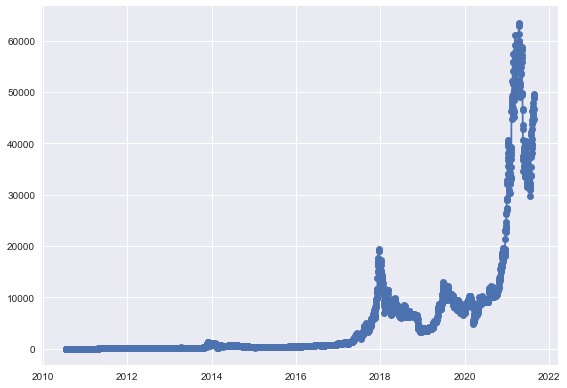

In [17]:
price_date = df['Date']
price_close = df['Price']
plt.plot_date(price_date, price_close, linestyle='solid')
plt.tight_layout()
plt.show()

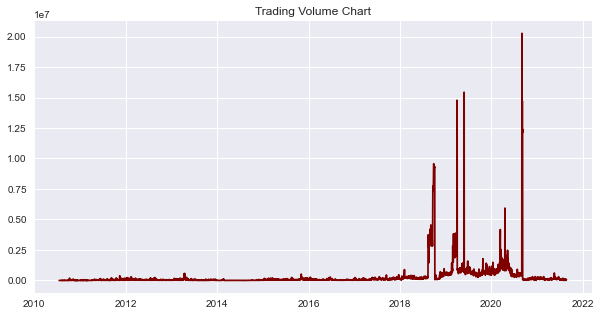

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df["Date"], df["Vol."], color ='maroon')
plt.title("Trading Volume Chart")
plt.show()

In [19]:
ma_day = [50, 200]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Price'].rolling(ma).mean()

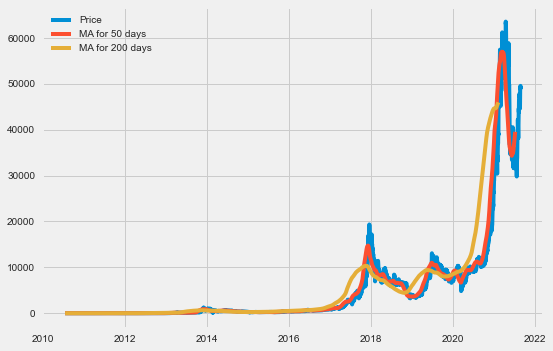

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(df['Date'],df[['Price', 'MA for 50 days', 'MA for 200 days']])
plt.legend(['Price', 'MA for 50 days', 'MA for 200 days'])

<AxesSubplot:>

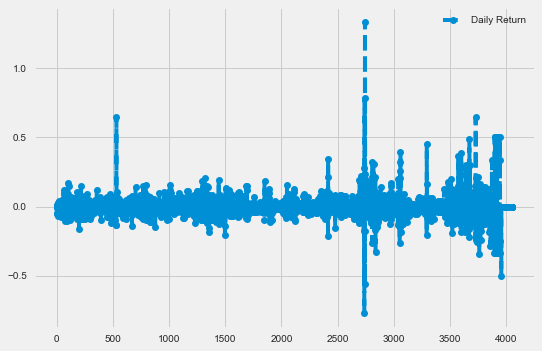

In [21]:
df['Daily Return'] = df['Price'].pct_change()
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')

C:\Users\saira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Daily Return')

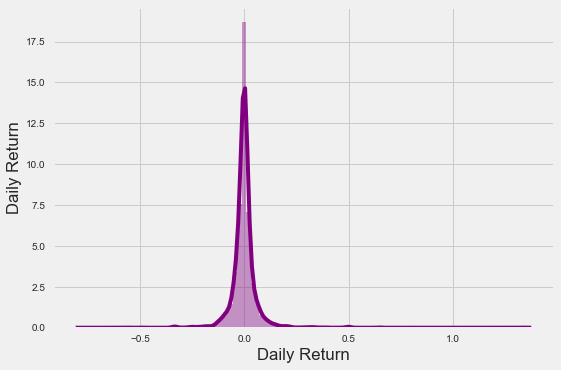

In [22]:
sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')

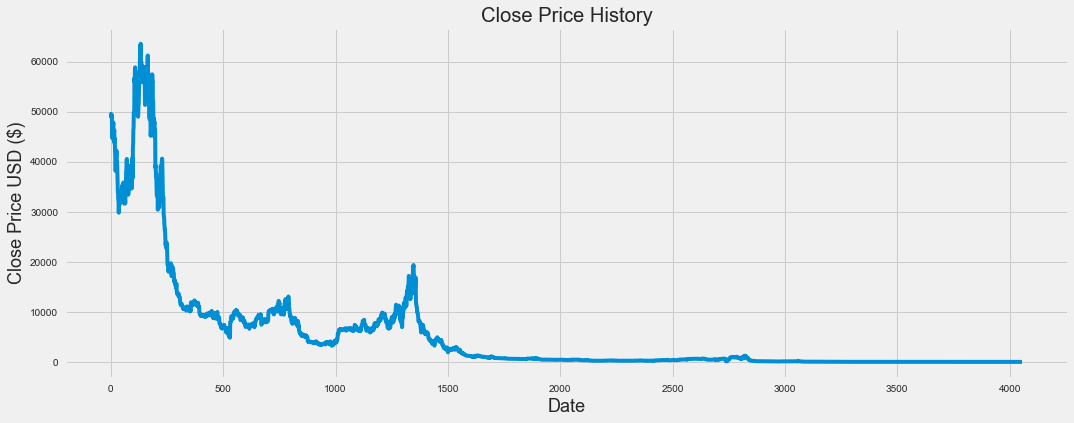

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
new =df['Date'].astype(str).str.split("-", n = 2, expand = True) 
df['year']= new[0]
df['month']= new[1]
df['day']= new[2]

In [25]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,MA for 50 days,MA for 200 days,Daily Return,year,month,day
0,2021-08-24,48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40,NaN,NaN,NaN,2021,08,24
1,2021-08-23,49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58,NaN,NaN,0.014196,2021,08,23
2,2021-08-22,49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77,NaN,NaN,-0.005757,2021,08,22
3,2021-08-21,48875.800781,49330.000000,49719.101562,48293.500000,18200.0,-0.91,NaN,NaN,-0.007689,2021,08,21
4,2021-08-20,49324.000000,46756.699219,49343.300781,46646.800781,83190.0,5.49,NaN,NaN,0.009170,2021,08,20


In [26]:
df=df.drop(['Date'],axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            4056 non-null   float32
 1   Open             4056 non-null   float32
 2   High             4056 non-null   float32
 3   Low              4056 non-null   float32
 4   Vol.             4056 non-null   float32
 5   Change %         4056 non-null   float32
 6   MA for 50 days   4007 non-null   float64
 7   MA for 200 days  3857 non-null   float64
 8   Daily Return     4055 non-null   float32
 9   year             4056 non-null   object 
 10  month            4056 non-null   object 
 11  day              4056 non-null   object 
dtypes: float32(7), float64(2), object(3)
memory usage: 269.5+ KB


In [28]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [29]:
df.isnull().sum()

Price                0
Open                 0
High                 0
Low                  0
Vol.                 0
Change %             0
MA for 50 days      49
MA for 200 days    199
Daily Return         1
year                 0
month                0
day                  0
dtype: int64

In [30]:
len(df)

4056

In [31]:
df.drop(["MA for 50 days","MA for 200 days","Daily Return"],axis=1,inplace=True)

In [32]:
x = df.drop(['Change %'],axis=1)
y=df['Change %']

In [33]:
x.keys()

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'year', 'month', 'day'], dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
import pickle 
# open a file, where you ant to store the data
file = open('bitcoin', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [47]:
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.linear_model import Lasso

In [55]:
la = Lasso()

In [56]:
la.fit(x_train,y_train)

C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+05, tolerance: 2.211e+01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [61]:
import pickle 
# open a file, where you ant to store the data
file = open('bitcoin_lasso', 'wb')

# dump information to that file
pickle.dump(la, file)

In [57]:
from sklearn.linear_model import Ridge

In [58]:
ra = Ridge()

In [59]:
ra.fit(x_train,y_train)

Ridge()

In [62]:
import pickle 
# open a file, where you ant to store the data
file = open('bitcoin_ridge', 'wb')

# dump information to that file
pickle.dump(ra, file)